In [14]:
#проверка подключения PostgreSQL 
import psycopg2
import pandas as pd
#Библиотека ждя визуализации
from IPython.display import HTML
import plotly.express as px

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DB_HOST = '52.157.159.24'
DB_USER = 'student5'
DB_USER_PASSWORD = 'student5_password'
DB_NAME = 'sql_ex_for_student5'

conn = psycopg2.connect(host=DB_HOST, user=DB_USER, password=DB_USER_PASSWORD, dbname=DB_NAME)

cur = conn.cursor()

In [57]:
# task3 (lesson5)
# Компьютерная фирма: Сделать на базе предыдущего view график - круговую диаграмму.
df = pd.read_sql_query("""select * from distribution_by_type_2""", conn)
fig = px.pie(df, values = 'round', names = 'type', title = 'Share type', width = 500, height = 400)
fig.show()

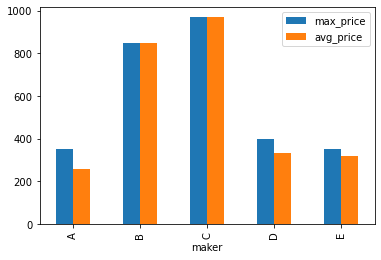

In [58]:
# task11 (lesson5)
# Компьютерная фирма: Построить график с со средней и максимальной ценами на базе
# products_with_lowest_price (X: maker, Y1: max_price, Y2: avg_price)

df = pd.read_sql_query("""select maker, max(price) as max_price , avg(price) as avg_price
from products_with_lowest_price_2 group by maker""", conn)\
    .set_index('maker')


df.plot(kind='bar')